In [95]:
%matplotlib inline

# DATA 620, Assignment 3: 2-Mode Network

Group Members:
Violeta Stoyanova
Sudhan Maharjan
Natalie Mollaghan

## Assignment Description
Here is a dataset that shows a simple 2-node network: the attendance of 18 Southern Women at 14 social events:

Brief Description: http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis. [For more background information, see also: http://rpackages.ianhowson.com/cran/latentnet/man/davis.html]. Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.
Dataset: http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat
Python code to create dataset: https://networkx.readthedocs.io/en/stable/examples/algorithms/davis_club.html
What can you infer about the relationships between (1) the women, and (2) the social events?

## Data and Graphs
The Davis Southern Club Women data set is available here - http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat. This data set is also included with the NetworkX package. The data set here is included with the NetworkX package and it comes as a bipartite graph (clubs, women).

These data were collected by Davis et al. in the 1930s. They represent observed attendance at 14 social events by 18 Southern women.v


Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1

#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price

#Friend meetings, Member
50 Evelyn Jefferson

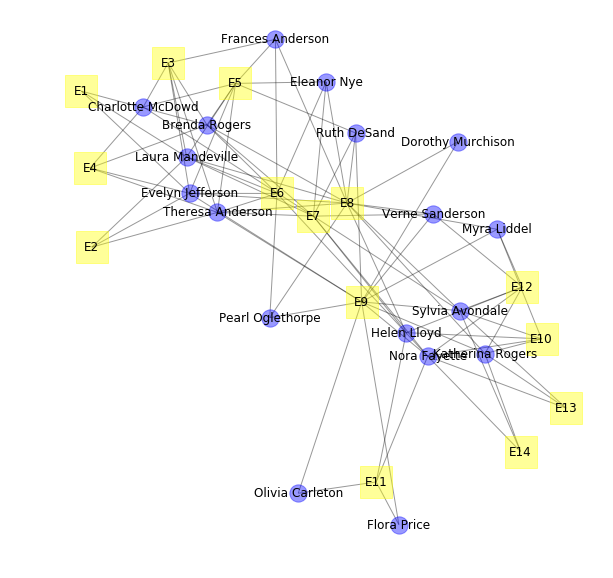

In [96]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite
from networkx import *


G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print('')
print("#Friends, Member")
for w in women:
    print('%d %s' % (W.degree(w), w))

# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print('')
print("#Friend meetings, Member")
for w in women:
    print('%d %s' % (W.degree(w, weight='weight'), w))


plt.figure(figsize = (10, 10))
plt.axis('off')
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=women, node_color='blue', alpha = 0.4)
nx.draw_networkx_nodes(G, pos, nodelist=clubs, node_color='yellow', alpha = 0.4, node_size = 1000, node_shape='s')
nx.draw_networkx_edges(G, pos, alpha = 0.4)
nx.draw_networkx_labels(G, pos);

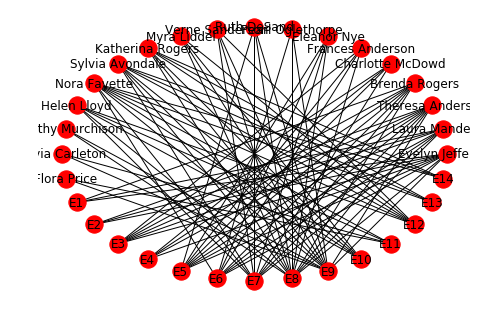

In [97]:
# Circular drawing pattern, which clearly demonstrates some nodes more connected than others.
nx.draw_circular(G, labels=None)
plt.show()

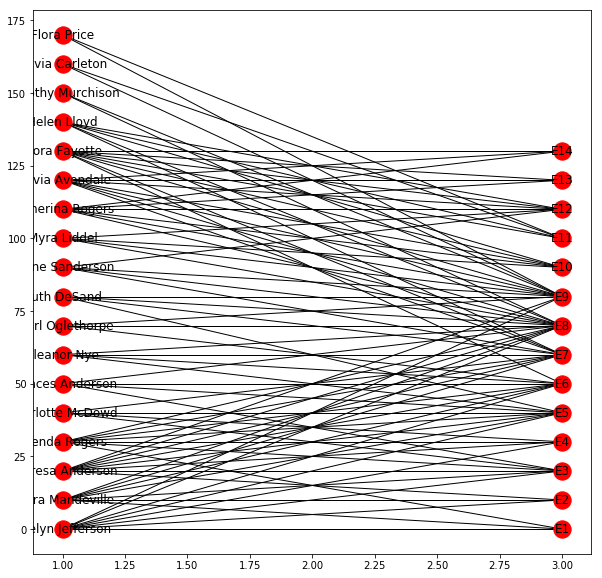

In [98]:
plt.figure(figsize = (10, 10))
pos = dict()
pos.update( (n, (1, i*10)) for i, n in enumerate(women) ) # put nodes from Women at x=1
pos.update( (n, (3, i*10)) for i, n in enumerate(clubs) ) # put nodes from Event at x=2
nx.draw_networkx(G, pos=pos, with_labels=True)

In [99]:
# Events like E3, E5, E6, E7, E8,E9, E10, E12 has more women participants than other events. It is unclear that if
# the participants know each other and convience others to come to the event or those events are more valuable than
# other events.

In [100]:
# Snapshot of the Network
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 89
Average degree:   5.5625


In [101]:
# Display the items in the 'women' list
women

['Evelyn Jefferson',
 'Laura Mandeville',
 'Theresa Anderson',
 'Brenda Rogers',
 'Charlotte McDowd',
 'Frances Anderson',
 'Eleanor Nye',
 'Pearl Oglethorpe',
 'Ruth DeSand',
 'Verne Sanderson',
 'Myra Liddel',
 'Katherina Rogers',
 'Sylvia Avondale',
 'Nora Fayette',
 'Helen Lloyd',
 'Dorothy Murchison',
 'Olivia Carleton',
 'Flora Price']

In [102]:
clubs

['E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9',
 'E10',
 'E11',
 'E12',
 'E13',
 'E14']

In [103]:
list(G.degree())


[('Evelyn Jefferson', 8),
 ('Laura Mandeville', 7),
 ('Theresa Anderson', 8),
 ('Brenda Rogers', 7),
 ('Charlotte McDowd', 4),
 ('Frances Anderson', 4),
 ('Eleanor Nye', 4),
 ('Pearl Oglethorpe', 3),
 ('Ruth DeSand', 4),
 ('Verne Sanderson', 4),
 ('Myra Liddel', 4),
 ('Katherina Rogers', 6),
 ('Sylvia Avondale', 7),
 ('Nora Fayette', 8),
 ('Helen Lloyd', 5),
 ('Dorothy Murchison', 2),
 ('Olivia Carleton', 2),
 ('Flora Price', 2),
 ('E1', 3),
 ('E2', 3),
 ('E3', 6),
 ('E4', 4),
 ('E5', 8),
 ('E6', 8),
 ('E7', 10),
 ('E8', 14),
 ('E9', 12),
 ('E10', 5),
 ('E11', 4),
 ('E12', 6),
 ('E13', 3),
 ('E14', 3)]

In [104]:
# Creates a new bipartite graph from a biadjacency matrix given as a SciPy sparse matrix.
print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G,women,clubs))


Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


In [105]:
print(nx.info(W))

Name: 
Type: Graph
Number of nodes: 18
Number of edges: 139
Average degree:  15.4444


When we project graph G into W (where the primary nodes are women), we see that there are a total of 18 nodes (which there are exactly 18 women in this study), and 139 connections (edges) among them. We can list the node degree for each women, which is shown below. The average degree here is 15.4444, which indicates that these women knew a significant amount of other women and interacted with them.

In [106]:
# Plotting a histogram of the women and their respective 'node degrees'
W_hist = sorted(nx.degree(W))
W_hist

[('Brenda Rogers', 15),
 ('Charlotte McDowd', 11),
 ('Dorothy Murchison', 16),
 ('Eleanor Nye', 15),
 ('Evelyn Jefferson', 17),
 ('Flora Price', 12),
 ('Frances Anderson', 15),
 ('Helen Lloyd', 17),
 ('Katherina Rogers', 16),
 ('Laura Mandeville', 15),
 ('Myra Liddel', 16),
 ('Nora Fayette', 17),
 ('Olivia Carleton', 12),
 ('Pearl Oglethorpe', 16),
 ('Ruth DeSand', 17),
 ('Sylvia Avondale', 17),
 ('Theresa Anderson', 17),
 ('Verne Sanderson', 17)]

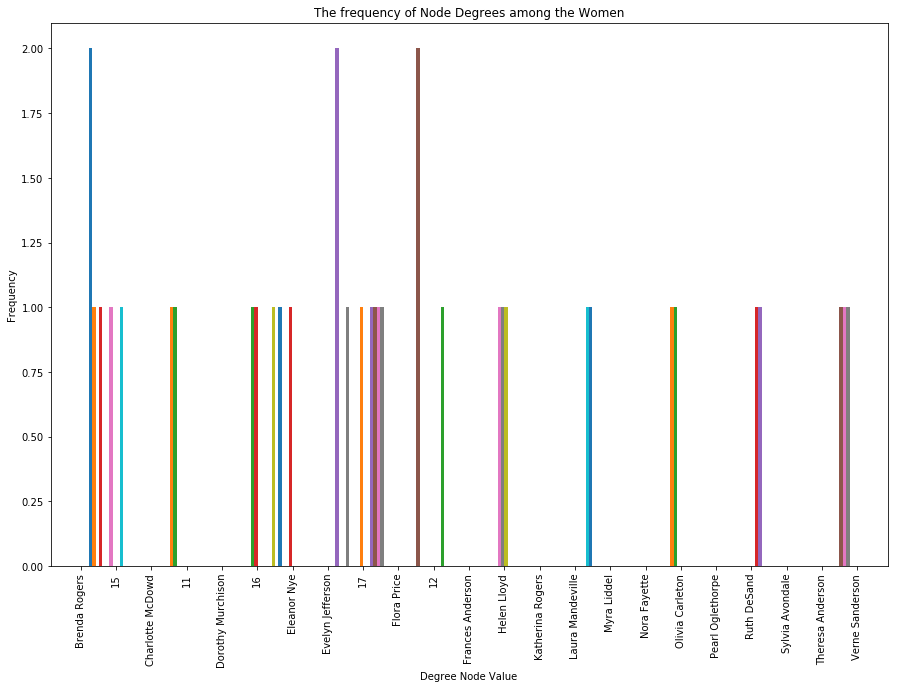

In [107]:
# Let's provide a visualization of what this looks like 
import numpy as np
# from matplotlib import pyplot as plt

fig = plt.figure(figsize=(15,10))
plt.hist(W_hist)
plt.xticks(rotation = 'vertical')
plt.title("The frequency of Node Degrees among the Women")
plt.xlabel("Degree Node Value")
plt.ylabel("Frequency")
plt.show()

In [108]:
# Above degree value shows that Brenda Rogers, Evelyn Jefferson and Flora Price are the most active memebrs between
# these 18 womens.

In [109]:
print("Betweenness")
b=betweenness_centrality(W)
for w in W.nodes():
    print("%s %5.3f"%(w,b[w]))

Betweenness
Evelyn Jefferson 0.010
Laura Mandeville 0.003
Theresa Anderson 0.010
Brenda Rogers 0.003
Charlotte McDowd 0.000
Frances Anderson 0.003
Eleanor Nye 0.003
Pearl Oglethorpe 0.005
Ruth DeSand 0.010
Verne Sanderson 0.010
Myra Liddel 0.005
Katherina Rogers 0.005
Sylvia Avondale 0.010
Nora Fayette 0.010
Helen Lloyd 0.010
Dorothy Murchison 0.005
Olivia Carleton 0.000
Flora Price 0.000


It appears that the betweenness_centrality values are quite low. Since the betweenness centrality is used to measure the nodes that serve as a bridge to other nodes we can see that this is not prevelant in this case. This means that none of the women was a bridge to connect to other women.

In [110]:
print("Degree centrality")
d=degree_centrality(W)
for v in W.nodes():
    print("%s %5.3f"%(v,d[v]))

Degree centrality
Evelyn Jefferson 1.000
Laura Mandeville 0.882
Theresa Anderson 1.000
Brenda Rogers 0.882
Charlotte McDowd 0.647
Frances Anderson 0.882
Eleanor Nye 0.882
Pearl Oglethorpe 0.941
Ruth DeSand 1.000
Verne Sanderson 1.000
Myra Liddel 0.941
Katherina Rogers 0.941
Sylvia Avondale 1.000
Nora Fayette 1.000
Helen Lloyd 1.000
Dorothy Murchison 0.941
Olivia Carleton 0.706
Flora Price 0.706


In [111]:
print("Closeness centrality")
c=closeness_centrality(W)
for v in W.nodes():
    print("%s %5.3f"%(v,c[v]))

Closeness centrality
Evelyn Jefferson 1.000
Laura Mandeville 0.895
Theresa Anderson 1.000
Brenda Rogers 0.895
Charlotte McDowd 0.739
Frances Anderson 0.895
Eleanor Nye 0.895
Pearl Oglethorpe 0.944
Ruth DeSand 1.000
Verne Sanderson 1.000
Myra Liddel 0.944
Katherina Rogers 0.944
Sylvia Avondale 1.000
Nora Fayette 1.000
Helen Lloyd 1.000
Dorothy Murchison 0.944
Olivia Carleton 0.773
Flora Price 0.773


This shows that all of the closeness_centrality scores are quite high, ranging from 0.7391304347 to 1.0, with 1.0 being a perfect score. Closeness is a measure of the degree to which an individual is near all other individuals in a network.This signifies that all of the women are closely connected to each other. We can analyze that if there is closeness between the members that means their is high chance that the members will participate on the events together. 

In [112]:
Clubs = bipartite.projected_graph(G, clubs)
Clubs_2 = bipartite.weighted_projected_graph(G, clubs)

In [113]:
print('') 
print("#All mutual members of other clubs, Club")
for c in clubs:
    print('%d %s' % (Clubs_2.degree(c,weight='weight'),c))


#All mutual members of other clubs, Club
19 E1
20 E2
32 E3
23 E4
38 E5
41 E6
48 E7
59 E8
46 E9
25 E10
13 E11
28 E12
18 E13
18 E14


In [114]:
# From above we can say that E8 has the highest mutual members and E11 has the lowest membrs.

In [115]:
#show degree for each club
print('') 
print("Number of Mutual members of at least one other club, Club")
for c in clubs:
    print('%d %s' % (Clubs.degree(c),c))


Number of Mutual members of at least one other club, Club
8 E1
8 E2
8 E3
8 E4
8 E5
13 E6
13 E7
13 E8
13 E9
8 E10
8 E11
8 E12
8 E13
8 E14


Presumably, the more important the event, the more likely these women are likely to show up. And especially, the more connected (higher degree node) women will presumably show up.Judging from these two lists the most popular event/club is E8 and the last popular event/club is E11.